In [2]:
!pip install scikit-learn

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder,LabelEncoder

# Data Exploration and Preprocessing.

## Loading of the dataset.

In [6]:
df = pd.read_csv(r"C:\Users\reddy\Downloads\data assingnment files\Assingnment files\Completed\EDA2\adult_with_headers.csv")

In [7]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df.shape

(32561, 15)

## Handling of missing values.

In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### --> While observing the above output there is no null values.

## Analysing the data throughout visuvalization.

### box graph for the data. 

<Axes: >

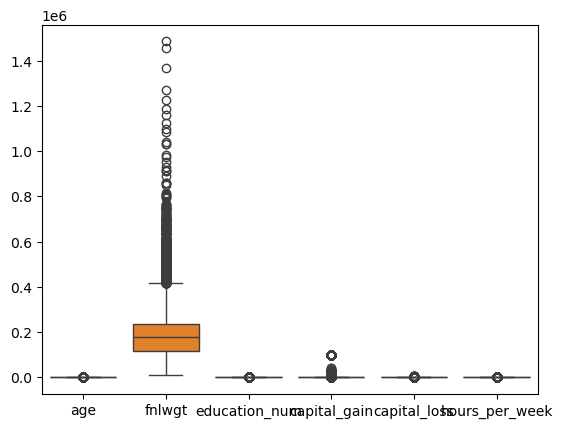

In [14]:
box_graph = sns.boxplot(df)
box_graph

#### -->while observing the above output the data have ouliers

## Saperation of Numerical and Categrical columns from the data.

In [17]:
Num_col = [i for i in df.columns if df[i].dtype !='O']
Num_col

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [18]:
Cat_col = [i for i in df.columns if df[i].dtype =='O']
Cat_col

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

## Process of removing the outliers from the data.

In [20]:
Q1 = df[Num_col].quantile(0.25)
Q3 = df[Num_col].quantile(0.75)
IQR = Q3-Q1
print(Q1,Q3,IQR)

age                   28.0
fnlwgt            117827.0
education_num          9.0
capital_gain           0.0
capital_loss           0.0
hours_per_week        40.0
Name: 0.25, dtype: float64 age                   48.0
fnlwgt            237051.0
education_num         12.0
capital_gain           0.0
capital_loss           0.0
hours_per_week        45.0
Name: 0.75, dtype: float64 age                   20.0
fnlwgt            119224.0
education_num          3.0
capital_gain           0.0
capital_loss           0.0
hours_per_week         5.0
dtype: float64


In [21]:
Lower_Extreame = Q1-1.5*IQR
Upper_Extreame = Q3+1.5*IQR
print(Lower_Extreame,Upper_Extreame)

age                  -2.0
fnlwgt           -61009.0
education_num         4.5
capital_gain          0.0
capital_loss          0.0
hours_per_week       32.5
dtype: float64 age                   78.0
fnlwgt            415887.0
education_num         16.5
capital_gain           0.0
capital_loss           0.0
hours_per_week        52.5
dtype: float64


## To access the data after removing of the ouliers.

In [51]:
outliers =(df[Num_col]<Lower_Extreame)&(df[Num_col]>Upper_Extreame)
outliers

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
32556,False,False,False,False,False,False
32557,False,False,False,False,False,False
32558,False,False,False,False,False,False
32559,False,False,False,False,False,False


## Apply scaling techniques to numerical features.

In [54]:
# Applying the standardscaler for numerical columns.
Std_end = StandardScaler()

In [56]:
df2 = pd.DataFrame(Std_end.fit_transform(outliers))
old_name = range(0,6)
new_name = Num_col
df3= df2.rename(columns=dict(zip(old_name,new_name)))
df3

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
32556,0.0,0.0,0.0,0.0,0.0,0.0
32557,0.0,0.0,0.0,0.0,0.0,0.0
32558,0.0,0.0,0.0,0.0,0.0,0.0
32559,0.0,0.0,0.0,0.0,0.0,0.0


# Encoding Techniques.

In [28]:
df[Cat_col].head(10)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,Jamaica,<=50K
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,>50K
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K


In [29]:
#OneHotEncoding for the Categrical columns
Ohe = OneHotEncoder()

In [30]:
cat = pd.DataFrame(Ohe.fit_transform(df[['race','sex']]),copy=bool)
cat

,0
0,"(0, 4)\t1.0\n (0, 6)\t1.0"
1,"(0, 4)\t1.0\n (0, 6)\t1.0"
2,"(0, 4)\t1.0\n (0, 6)\t1.0"
3,"(0, 2)\t1.0\n (0, 6)\t1.0"
4,"(0, 2)\t1.0\n (0, 5)\t1.0"
...,...
32556,"(0, 4)\t1.0\n (0, 5)\t1.0"
32557,"(0, 4)\t1.0\n (0, 6)\t1.0"
32558,"(0, 4)\t1.0\n (0, 5)\t1.0"
32559,"(0, 4)\t1.0\n (0, 6)\t1.0"


In [31]:
#Ordinal Encoder for Categrical columns.
Ord = OrdinalEncoder()

In [32]:
ads=Ord.fit_transform(df[Cat_col])
new_block = pd.DataFrame(ads)
new_block

,0,1,2,3,4,5,6,7,8
0,7.0,9.0,4.0,1.0,1.0,4.0,1.0,39.0,0.0
1,6.0,9.0,2.0,4.0,0.0,4.0,1.0,39.0,0.0
2,4.0,11.0,0.0,6.0,1.0,4.0,1.0,39.0,0.0
3,4.0,1.0,2.0,6.0,0.0,2.0,1.0,39.0,0.0
4,4.0,9.0,2.0,10.0,5.0,2.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...
32556,4.0,7.0,2.0,13.0,5.0,4.0,0.0,39.0,0.0
32557,4.0,11.0,2.0,7.0,0.0,4.0,1.0,39.0,1.0
32558,4.0,11.0,6.0,1.0,4.0,4.0,0.0,39.0,0.0
32559,4.0,11.0,4.0,1.0,3.0,4.0,1.0,39.0,0.0


In [33]:
# Rename for the categrical columns
old_name=range(0,9)
new_name=Cat_col
df4=new_block.rename(columns=dict(zip(old_name,new_name)))
df4

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,7.0,9.0,4.0,1.0,1.0,4.0,1.0,39.0,0.0
1,6.0,9.0,2.0,4.0,0.0,4.0,1.0,39.0,0.0
2,4.0,11.0,0.0,6.0,1.0,4.0,1.0,39.0,0.0
3,4.0,1.0,2.0,6.0,0.0,2.0,1.0,39.0,0.0
4,4.0,9.0,2.0,10.0,5.0,2.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...
32556,4.0,7.0,2.0,13.0,5.0,4.0,0.0,39.0,0.0
32557,4.0,11.0,2.0,7.0,0.0,4.0,1.0,39.0,1.0
32558,4.0,11.0,6.0,1.0,4.0,4.0,0.0,39.0,0.0
32559,4.0,11.0,4.0,1.0,3.0,4.0,1.0,39.0,0.0


In [34]:
final_data = pd.concat([df3,df4])
final_data.fillna(0,inplace=True)

In [35]:
final_data.isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [36]:
final_data

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,2.0,13.0,5.0,4.0,0.0,39.0,0.0
32557,0.0,0.0,0.0,0.0,0.0,0.0,4.0,11.0,2.0,7.0,0.0,4.0,1.0,39.0,1.0
32558,0.0,0.0,0.0,0.0,0.0,0.0,4.0,11.0,6.0,1.0,4.0,4.0,0.0,39.0,0.0
32559,0.0,0.0,0.0,0.0,0.0,0.0,4.0,11.0,4.0,1.0,3.0,4.0,1.0,39.0,0.0


#  Feature Engineering

## Creating of new features 

In [39]:
# 1. Create 'Income_Binary' feature
df['Income_Binary'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# 2. Create 'Hours_per_Year' feature
df['Hours_per_Year'] = df['hours_per_week'] * 52

# Display the updated dataframe with new features
df5=df[['Income_Binary','Hours_per_Year']]
df5

,Income_Binary,Hours_per_Year
0,0,2080
1,0,676
2,0,2080
3,0,2080
4,0,2080
...,...,...
32556,0,1976
32557,0,2080
32558,0,2080
32559,0,1040


In [40]:
# Adding of new features into the old data.
df6 = pd.concat([final_data,df5])
df6.fillna(0,inplace=True)

# Feature Selection

In [42]:
from sklearn.ensemble import IsolationForest

In [43]:
features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
X = df6[features]

In [44]:
iso_forest = IsolationForest(contamination=0.05, random_state=42) 

In [45]:
outliers = iso_forest.fit_predict(X)
outliers

array([1, 1, 1, ..., 1, 1, 1])

In [46]:
# Convert predictions to a boolean mask (1 for inliers, -1 for outliers)
outliers_mask = outliers == -1

# Filter out the outliers
df_cleaned = df6[~outliers_mask]
df_cleaned

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income,Income_Binary,Hours_per_Year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1976.0
32557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2080.0
32558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2080.0
32559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1040.0


## Process to instalation of ppscore

In [ ]:
!pip install ppscore

In [ ]:
import ppscore as pps

In [ ]:
# Compute the PPS matrix
pps_matrix = pps.matrix(df6)
# Display the PPS matrix
pps_matrix

In [ ]:
# Compute the correlation matrix
correlation_matrix = df6.corr()

# Display the correlation matrix
correlation_matrix


In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plotting the PPS heatmap
plt.subplot(1, 2, 1)
sns.heatmap(pps_matrix[['x', 'y', 'pps']], annot=True, fmt=".2f", cmap='coolwarm')
plt.title('PPS Matrix')

# Plotting the correlation heatmap
plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()